# Exploring Dandiset 001375: Septum GABA Disruption with DREADDs

> **Note**: This notebook was generated with the assistance of AI. Please be cautious when interpreting code or results.

## Overview

This notebook explores Dandiset 001375, which contains data from a pilot study investigating the effects of disrupting septal GABAergic activity using DREADDs (Designer Receptors Exclusively Activated by Designer Drugs) on hippocampal and neocortical activity.

Dandiset URL: [https://dandiarchive.org/dandiset/001375/0.250406.1855](https://dandiarchive.org/dandiset/001375/0.250406.1855)

In this notebook, we will:
1. Explore the metadata of the Dandiset
2. List and examine the NWB files available
3. Load and analyze neural recording data
4. Visualize spike times and basic electrophysiological recordings
5. Examine trial structure and unit activity

## Required Packages

In [1]:
# Import necessary libraries
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
from dandi.dandiapi import DandiAPIClient
import pandas as pd

## Exploring Dandiset Metadata

In [2]:
# Initialize DandiAPI client and access the Dandiset
client = DandiAPIClient()
dandiset = client.get_dandiset("001375", "0.250406.1855")
metadata = dandiset.get_raw_metadata()

# Display basic information about the Dandiset
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Description: {metadata['description']}")
print(f"License: {metadata['license'][0]}")
print(f"Version: {metadata['version']}")

Dandiset name: Septum GABA disruption with DREADDs
Dandiset URL: https://dandiarchive.org/dandiset/001375/0.250406.1855
Description: Pilot study of the effect of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity
License: spdx:CC-BY-4.0
Version: 0.250406.1855


## Exploring Available NWB Files

In [3]:
# List the available NWB files in the Dandiset
assets = list(dandiset.get_assets())
nwb_files = [asset.path for asset in assets if asset.path.endswith('.nwb')]

print(f"Number of NWB files: {len(nwb_files)}")
for i, file in enumerate(nwb_files):
    print(f"{i+1}. {file}")

Number of NWB files: 3
1. sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb
2. sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12781w8_ecephys.nwb
3. sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ardad2_ecephys.nwb


The Dandiset contains 3 NWB files from 2 subjects. Let's examine one of these files in more detail.

## Loading and Exploring an NWB File

In [4]:
# We'll examine the first NWB file from subject MS13B
file_path = "sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb"

# Get the download URL for the file
asset = next(dandiset.get_assets_by_glob(file_path))
url = asset.download_url

# Open the file using remfile to stream without downloading
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### Basic Information about the NWB File

In [5]:
# Extract and display basic metadata
print(f"NWB File: {file_path}")
print(f"Session Description: {nwb.session_description}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Identifier: {nwb.identifier}")

# Subject information
subject = nwb.subject
print("\nSubject Information:")
print(f"  ID: {subject.subject_id}")
print(f"  Age: {subject.age}")
print(f"  Sex: {subject.sex}")
print(f"  Species: {subject.species}")
print(f"  Description: {subject.description}")

NWB File: sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb
Session Description: mouse running laps in virtual hallway
Session Start Time: 2024-07-25 19:00:00-07:00
Identifier: MS13B

Subject Information:
  ID: MS13B
  Age: P90D
  Sex: M
  Species: Mus musculus
  Description: medial septum DREADD to suppress GABA interneurons


## Electrode and Device Information

In [6]:
# Examine device information
devices = nwb.devices
print("Devices:")
for device_name, device in devices.items():
    print(f"  {device_name}: {device.description}, Manufacturer: {device.manufacturer}")

# Examine electrode groups
electrode_groups = nwb.electrode_groups
print("\nElectrode Groups:")
for group_name, group in electrode_groups.items():
    print(f"  {group_name}: {group.description}")
    print(f"    Location: {group.location}")
    print(f"    Device: {group.device.description}")

Devices:
  silicon probe array: 128 ch silicon probe, Manufacturer: UCLA

Electrode Groups:
  shank1: shank1, electrodes
    Location: ventral hippocampus, visual cortex
    Device: 128 ch silicon probe
  shank2: shank2, electrodes
    Location: ventral hippocampus, visual cortex
    Device: 128 ch silicon probe


### Examining Electrodes Table

In [7]:
# Convert electrodes to dataframe for easier exploration
electrodes_df = nwb.electrodes.to_dataframe()

# Display basic information about electrodes
print(f"Number of electrodes: {len(electrodes_df)}")
print("First 5 electrodes:")
display(electrodes_df.head())

# Group information
print("\nElectrode group distribution:")
print(electrodes_df['group_name'].value_counts())

Number of electrodes: 256
First 5 electrodes:


,x,y,location,filtering,group,group_name,label
id,,,,,,,
0,20.0,1375.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x14049...,shank1,shank1-electrode001
1,20.0,1325.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x14049...,shank1,shank1-electrode002
2,20.0,1275.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x14049...,shank1,shank1-electrode003
3,20.0,1225.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x14049...,shank1,shank1-electrode004
4,20.0,1175.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x14049...,shank1,shank1-electrode005



Electrode group distribution:
group_name
shank1    128
shank2    128
Name: count, dtype: int64


## Neural Data Acquisition

In [8]:
# Examine acquisition data
acq = nwb.acquisition['time_series']
print(f"Data dimensions: {acq.data.shape}")
print(f"Sampling rate: {acq.rate} Hz")
print(f"Unit: {acq.unit}")
print(f"Data duration: {acq.data.shape[0] / acq.rate:.2f} seconds")

Data dimensions: (144675584, 256)
Sampling rate: 30000.0 Hz
Unit: mV
Data duration: 4822.52 seconds


Let's visualize a short segment of the raw electrophysiology data from a few channels:

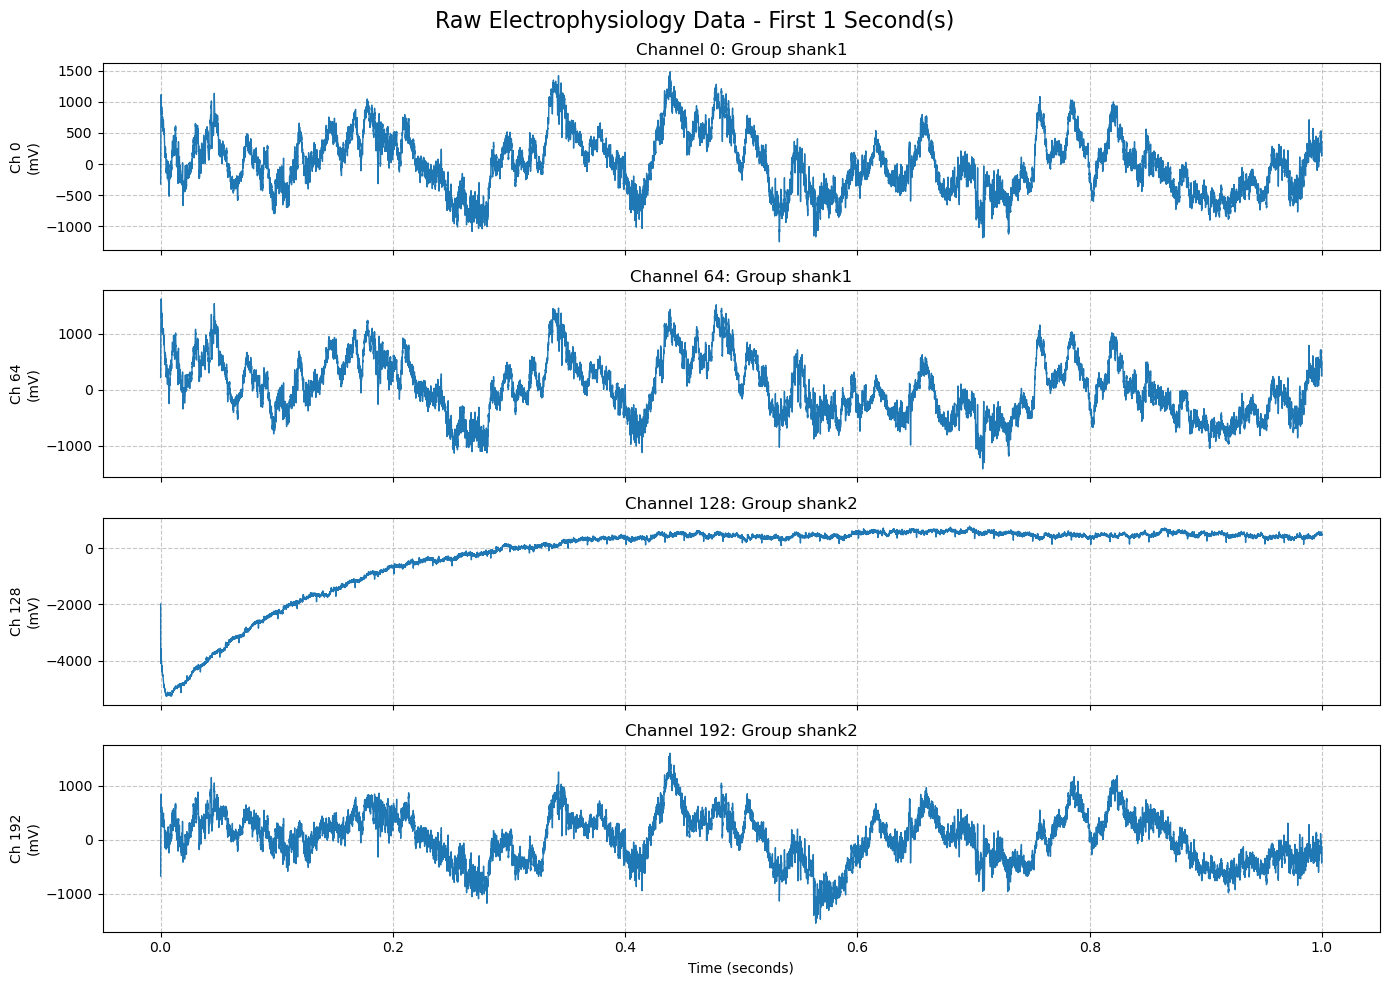

In [9]:
# Plot a short segment of raw data from 4 channels
fig, axs = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

# Define time window to plot (first 1 second)
time_window = 1  # seconds
sample_count = int(time_window * acq.rate)
time_vector = np.arange(sample_count) / acq.rate

# Select 4 channels to plot (from different areas if possible)
channels_to_plot = [0, 64, 128, 192]  # Example channels spread across the array

for i, channel in enumerate(channels_to_plot):
    # Get channel data
    channel_data = acq.data[:sample_count, channel]
    
    # Plot
    axs[i].plot(time_vector, channel_data, linewidth=1)
    axs[i].set_ylabel(f"Ch {channel}\n({acq.unit})")
    axs[i].grid(True, linestyle='--', alpha=0.7)
    
    # Add electrode location
    electrode_info = electrodes_df.iloc[channel]
    axs[i].set_title(f"Channel {channel}: Group {electrode_info['group_name']}")

axs[-1].set_xlabel("Time (seconds)")
plt.suptitle(f"Raw Electrophysiology Data - First {time_window} Second(s)", fontsize=16)
plt.tight_layout()
plt.show()

## Trials Information

Number of trials: 387
First 5 trials:


,start_time,stop_time
id,,
0,4.323800,16.929833
1,16.963067,28.414333
2,28.447100,39.402833
3,39.435833,50.027033
4,50.059667,63.064467


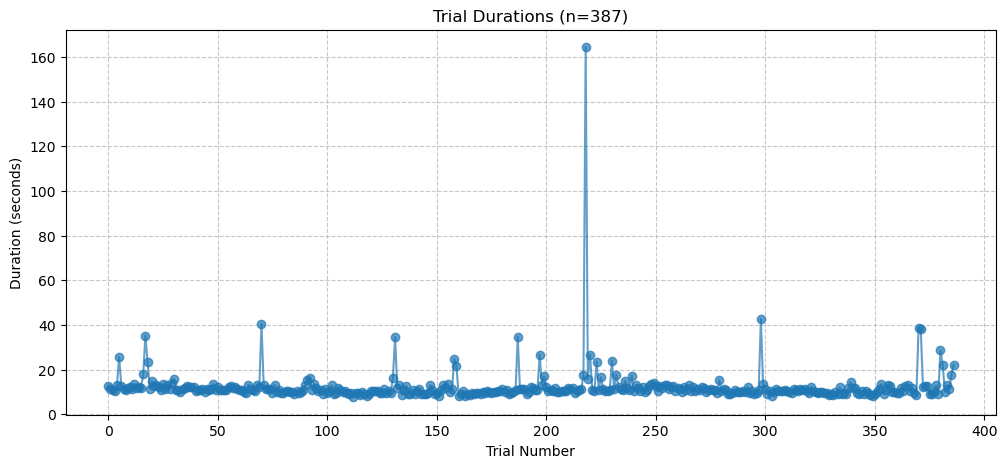

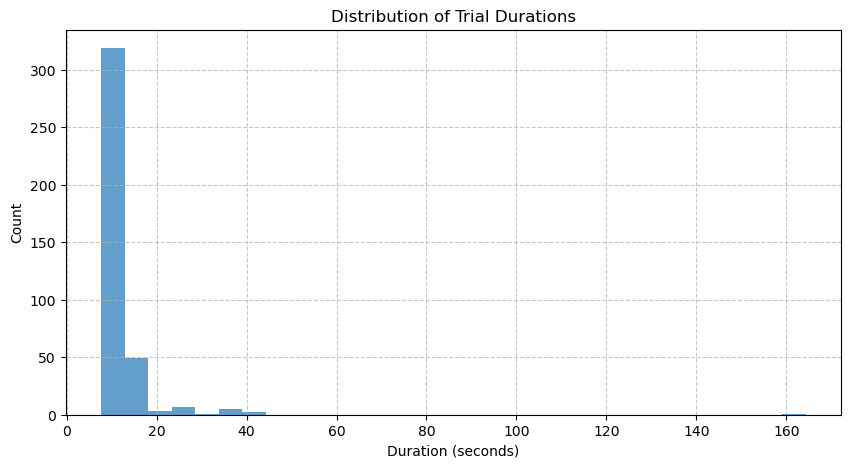

In [10]:
# Examine trials information
trials_df = nwb.trials.to_dataframe()
print(f"Number of trials: {len(trials_df)}")
print("First 5 trials:")
display(trials_df.head())

# Calculate trial durations
trials_df['duration'] = trials_df['stop_time'] - trials_df['start_time']

# Plot trial durations
plt.figure(figsize=(12, 5))
plt.plot(trials_df.index, trials_df['duration'], 'o-', alpha=0.7)
plt.xlabel("Trial Number")
plt.ylabel("Duration (seconds)")
plt.title(f"Trial Durations (n={len(trials_df)})")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Distribution of trial durations
plt.figure(figsize=(10, 5))
plt.hist(trials_df['duration'], bins=30, alpha=0.7)
plt.xlabel("Duration (seconds)")
plt.ylabel("Count")
plt.title("Distribution of Trial Durations")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Analyzing Unit Activity

In [11]:
# Examine units
units_df = nwb.units.to_dataframe()
print(f"Number of units: {len(units_df)}")
print("Unit information:")
display(units_df.head())

Number of units: 33
Unit information:


,spike_times
id,
1,"[3.5485, 3.5543666666666667, 3.784666666666667..."
2,"[0.1826, 0.21976666666666667, 0.77823333333333..."
3,"[0.005533333333333334, 0.01633333333333333, 0...."
4,"[0.5452333333333333, 0.5632, 0.572833333333333..."
5,"[0.07036666666666666, 0.1002, 0.17066666666666..."


Let's examine the spike times for a few units:

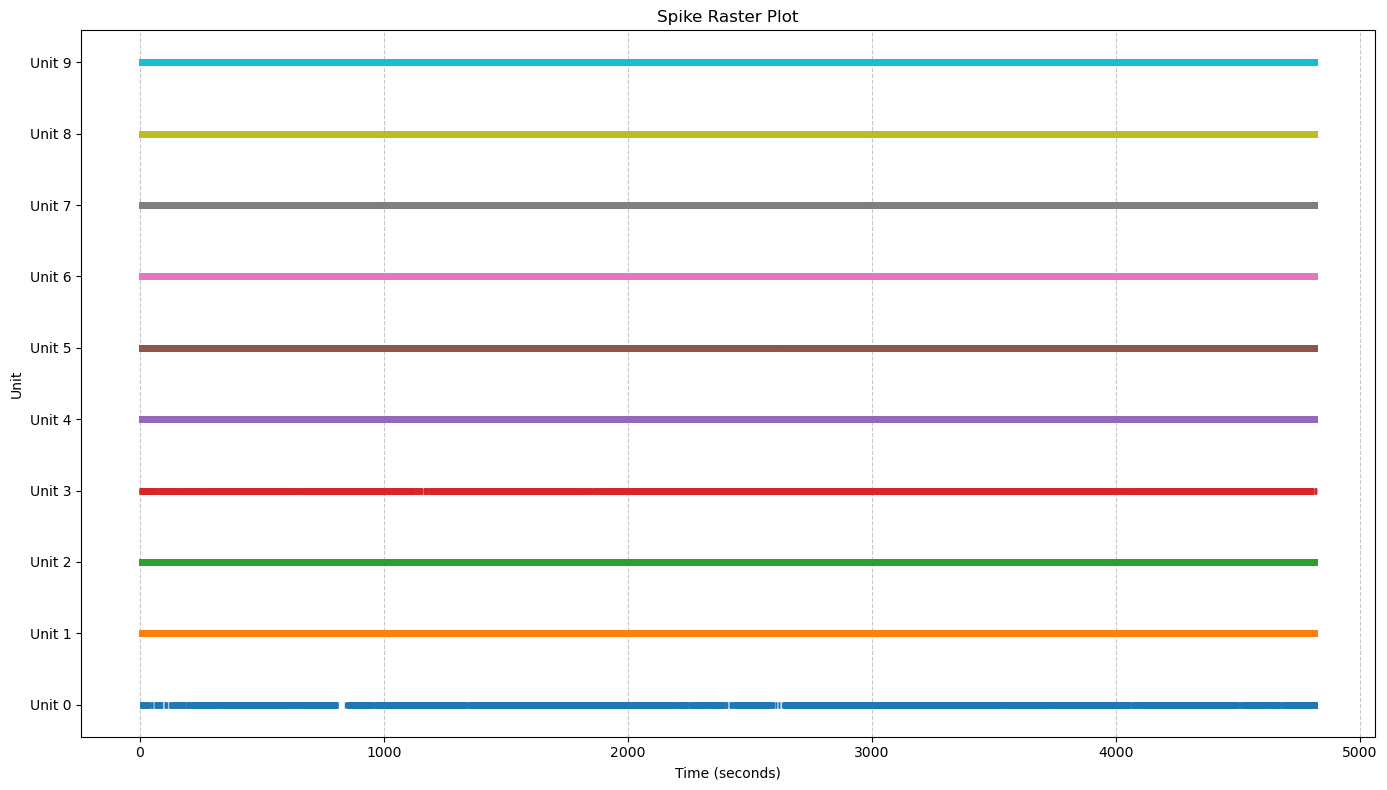

In [12]:
# Plot spike raster for multiple units
fig, ax = plt.subplots(figsize=(14, 8))

# Get the first 10 units (or all if less than 10)
num_units_to_plot = min(10, len(units_df))
unit_ids = list(range(num_units_to_plot))

# Plot spikes for each unit
for i, unit_id in enumerate(unit_ids):
    # Get spike times for this unit
    spike_times = nwb.units.spike_times_index[unit_id]
    
    # Plot spike times as dots
    ax.plot(spike_times, np.ones_like(spike_times) * i, '|', markersize=5, 
            label=f"Unit {unit_id}")

# Customize plot
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Unit")
ax.set_yticks(range(num_units_to_plot))
ax.set_yticklabels([f"Unit {i}" for i in unit_ids])
ax.set_title("Spike Raster Plot")
ax.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Analyzing Spiking Activity During Trials

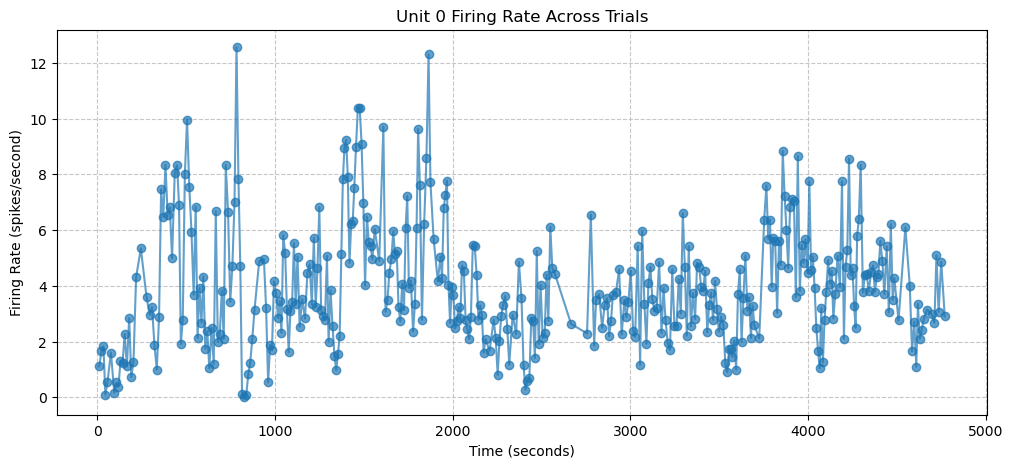

In [13]:
# Let's analyze the firing rate for one unit across trials
selected_unit = 0
spike_times = nwb.units.spike_times_index[selected_unit]

# Calculate firing rates for each trial
trial_rates = []
trial_midpoints = []

for _, trial in trials_df.iterrows():
    start = trial['start_time']
    end = trial['stop_time']
    duration = end - start
    
    # Count spikes in this trial
    spikes_in_trial = np.sum((spike_times >= start) & (spike_times < end))
    
    # Calculate firing rate
    rate = spikes_in_trial / duration
    trial_rates.append(rate)
    
    # Trial midpoint for plotting
    trial_midpoints.append((start + end) / 2)

# Plot firing rates across trials
plt.figure(figsize=(12, 5))
plt.plot(trial_midpoints, trial_rates, 'o-', alpha=0.7)
plt.xlabel("Time (seconds)")
plt.ylabel("Firing Rate (spikes/second)")
plt.title(f"Unit {selected_unit} Firing Rate Across Trials")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Visualizing Spike Waveforms in Raw Data

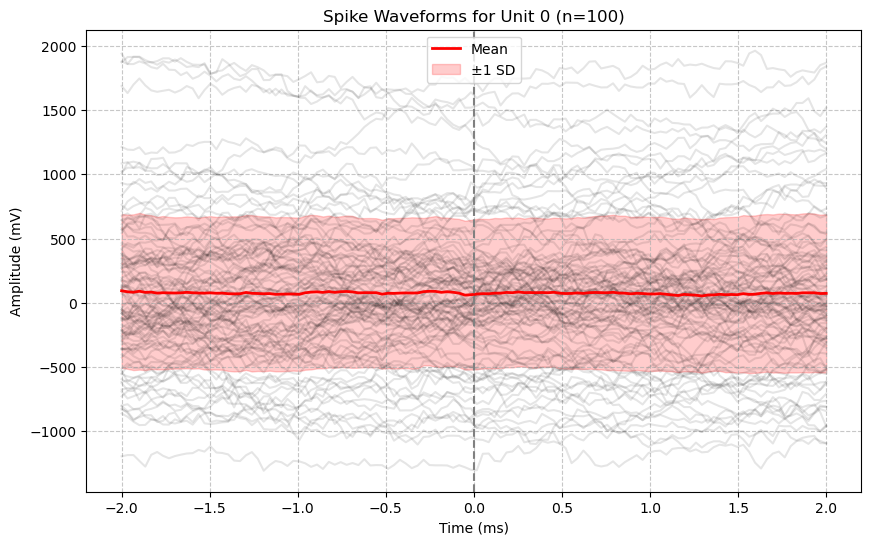

In [14]:
# Let's extract raw data around spike times to visualize average waveforms
def extract_waveforms(data, spike_times, sampling_rate, window_ms=2, channel=0):
    """Extract waveforms around spike times"""
    samples_per_ms = sampling_rate / 1000
    window_samples = int(window_ms * samples_per_ms)
    
    spike_indices = (spike_times * sampling_rate).astype(int)
    waveforms = []
    
    for spike_idx in spike_indices:
        if spike_idx - window_samples >= 0 and spike_idx + window_samples < data.shape[0]:
            waveform = data[spike_idx - window_samples:spike_idx + window_samples, channel]
            waveforms.append(waveform)
            
    return np.array(waveforms)

# Select a unit and channel for visualization
selected_unit = 0
selected_channel = 0  # Assuming spikes are most visible on first channel

# Get spike times and extract waveforms
spike_times = nwb.units.spike_times_index[selected_unit]

# Limit to first 100 spikes to avoid memory issues
spike_times = spike_times[:100] 

waveforms = extract_waveforms(acq.data, spike_times, acq.rate, window_ms=2, channel=selected_channel)

# Plot average waveform with individual traces
plt.figure(figsize=(10, 6))
time_ms = np.linspace(-2, 2, waveforms.shape[1])

# Plot individual waveforms (semi-transparent)
for waveform in waveforms:
    plt.plot(time_ms, waveform, 'k-', alpha=0.1)

# Plot average waveform
mean_waveform = np.mean(waveforms, axis=0)
std_waveform = np.std(waveforms, axis=0)
plt.plot(time_ms, mean_waveform, 'r-', linewidth=2, label='Mean')

# Add confidence interval
plt.fill_between(
    time_ms, 
    mean_waveform - std_waveform, 
    mean_waveform + std_waveform, 
    color='r', alpha=0.2, label='±1 SD'
)

plt.axvline(x=0, color='gray', linestyle='--')
plt.xlabel('Time (ms)')
plt.ylabel(f'Amplitude ({acq.unit})')
plt.title(f'Spike Waveforms for Unit {selected_unit} (n={len(waveforms)})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Summary and Next Steps

In this notebook, we've explored Dandiset 001375, which contains electrophysiology data from mice with DREADD-mediated disruption of septal GABAergic neurons. We've examined:

1. The structure of the NWB files and metadata
2. Electrode configuration and recording details
3. Raw electrophysiological data
4. Trial structures during behavioral tasks
5. Unit firing patterns and waveform characteristics

Potential future analyses could include:
- Cross-session comparisons of neural activity
- More detailed spike-train analysis (e.g., ISI distributions)
- Correlating neural activity with trial features
- Comparing activity patterns across brain regions